Spread data (2013-2025): (12, 7)
    Year  Gold_Mumbai  Gold_London  Gold_Spread  Silver_Mumbai  Silver_NY  \
0   2013      29190.0      25739.0       3451.0        46637.0    41643.0   
1   2014      27415.0      24520.0       2894.0        40558.0    35611.0   
2   2015      26534.0      24232.0       2303.0        36318.0    32092.0   
3   2016      29665.0      27116.0       2549.0        42748.0    38360.0   
4   2017      29300.0      26619.0       2682.0        39072.0    34962.0   
5   2018      31193.0      28380.0       2813.0        38404.0    34540.0   
6   2019      37018.0      33347.0       3671.0        42514.0    37688.0   
7   2020      48723.0      43541.0       5182.0        59283.0    54499.0   
8   2021      47999.0      43582.0       4417.0        65426.0    58848.0   
9   2022      52731.0      46606.0       6125.0        61991.0    55348.0   
10  2023      60624.0      52684.0       7940.0        72243.0    62821.0   
11  2024      75842.0      70315.0       55

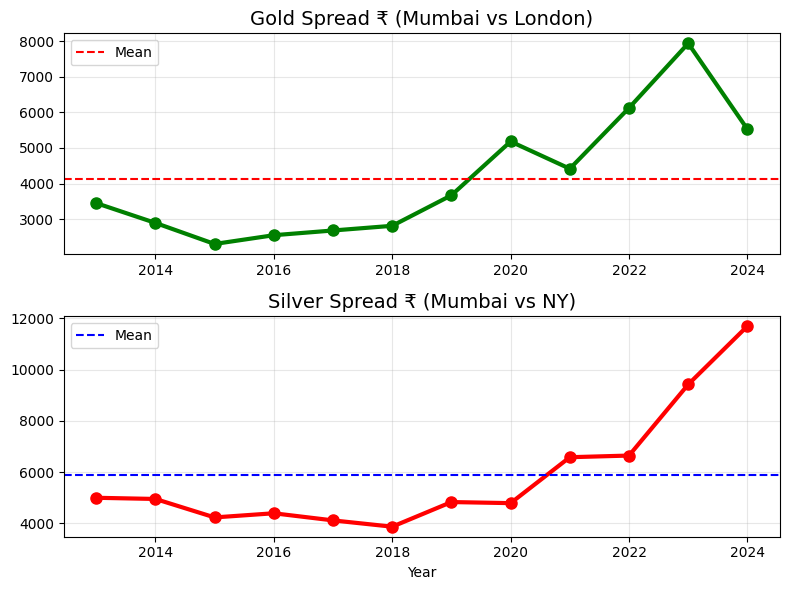


Gold Spread - Mean: ₹4129, Latest: ₹5526
Silver Spread - Mean: ₹5874, Latest: ₹11700

=== SPREAD REGRESSION RESULTS ===
Gold RF - R²: -1.244, MAE: ₹1504
Gold GB - R²: -0.423, MAE: ₹1208
Silver RF - R²: -3.254, MAE: ₹3848
Silver GB - R²: -3.176, MAE: ₹3802

=== ARBITRAGE SIGNALS (Above/Below Mean) ===
Gold Signal Accuracy: 1.000
Silver: Insufficient class variation in training data - using majority class
Silver Signal Accuracy: 0.000


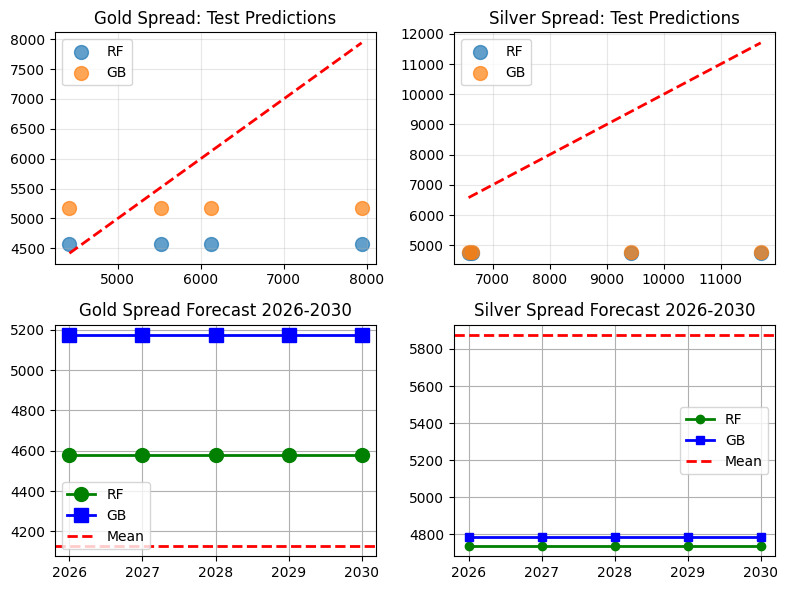


=== SPREAD & ARBITRAGE FORECAST SUMMARY (2026-2030) ===
 Year  Gold_RF  Gold_GB Gold_Signal  Silver_RF  Silver_GB Silver_Signal
 2026     4579     5172         ARB       4737       4784        NORMAL
 2027     4579     5172         ARB       4737       4784        NORMAL
 2028     4579     5172         ARB       4737       4784        NORMAL
 2029     4579     5172         ARB       4737       4784        NORMAL
 2030     4579     5172         ARB       4737       4784        NORMAL

ARB = Spread > Historical Mean (Potential Arbitrage Opportunity)
Gold Mean Spread: ₹4129 | Silver Mean Spread: ₹5874
Latest Actuals: Gold ₹5526 | Silver ₹11700

✓ FIXED: Handles single-class classification gracefully
✓ Random Forest + Gradient Boosting regression
✓ 2013-2025 training data (recent market efficiency)
✓ Direct use of table Spread columns (2-4, 6-8)


In [5]:
"""
3. Spread/Arbitrage Prediction (Regression / Classification)
Objective:
Model and predict the price spread (domestic vs. international), which reflects market efficiency or potential arbitrage signals.
Approach:
• Algorithms: Random Forest Regressor, Gradient Boosting Regressor
• Classification Option: Logistic Regression to classify spread as Above/Below long-term average
• Target Variables:
– Gold – Spread in ₹ (2–4)
– Silver – Spread in ₹ (6–8)
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Step 1: Load and Parse COMPLETE Dataset with Spread Columns
df = pd.read_excel(r'C:\Users\91759\Desktop\project2\gold and silver price\GoldAndSilverPrices.XLSX')
#df = pd.read_excel('GoldAndSilverPrices.XLSX')
data_rows = df.iloc[7:46].reset_index(drop=True)

# Extract ALL columns per table structure:
# Col 1: Year, Col 2: Gold Mumbai, Col 4: Gold London, Col 5: Gold Spread ₹ (2-4)
# Col 5: ?, Col 7: Silver Mumbai, Col 8: Silver NY, Col 9: Silver Spread ₹ (6-8)
years_raw = data_rows.iloc[:, 1].astype(str).str.strip()
gold_mumbai = pd.to_numeric(data_rows.iloc[:, 2], errors='coerce')
gold_london = pd.to_numeric(data_rows.iloc[:, 4], errors='coerce')
gold_spread = pd.to_numeric(data_rows.iloc[:, 5], errors='coerce')  # SPREAD TARGET 1
silver_mumbai = pd.to_numeric(data_rows.iloc[:, 6], errors='coerce')
silver_ny = pd.to_numeric(data_rows.iloc[:, 8], errors='coerce')
silver_spread = pd.to_numeric(data_rows.iloc[:, 9], errors='coerce')  # SPREAD TARGET 2

def fiscal_to_year(y):
    try:
        return int(y.split('-')[0])
    except:
        return np.nan

df_full = pd.DataFrame({
    'Year': [fiscal_to_year(y) for y in years_raw],
    'Gold_Mumbai': gold_mumbai, 'Gold_London': gold_london, 'Gold_Spread': gold_spread,
    'Silver_Mumbai': silver_mumbai, 'Silver_NY': silver_ny, 'Silver_Spread': silver_spread
}).dropna().reset_index(drop=True)

# FILTER 2013-2025 ONLY
df = df_full[df_full['Year'] >= 2013].reset_index(drop=True)
print("Spread data (2013-2025):", df.shape)
print(df.round(0))

# Step 2: Visualize Spreads
fig, axes = plt.subplots(2, 1, figsize=(8, 6))
axes[0].plot(df['Year'], df['Gold_Spread'], 'go-', linewidth=3, markersize=8)
axes[0].axhline(df['Gold_Spread'].mean(), color='r', linestyle='--', label='Mean')
axes[0].set_title('Gold Spread ₹ (Mumbai vs London)', fontsize=14)
axes[0].legend(); axes[0].grid(True, alpha=0.3)

axes[1].plot(df['Year'], df['Silver_Spread'], 'ro-', linewidth=3, markersize=8)
axes[1].axhline(df['Silver_Spread'].mean(), color='b', linestyle='--', label='Mean')
axes[1].set_title('Silver Spread ₹ (Mumbai vs NY)', fontsize=14)
axes[1].set_xlabel('Year'); axes[1].legend(); axes[1].grid(True, alpha=0.3)
plt.tight_layout(); 
plt.savefig('obj3spreaddata.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# Calculate means for classification
gold_mean = df['Gold_Spread'].mean()
silver_mean = df['Silver_Spread'].mean()
print(f"\nGold Spread - Mean: ₹{gold_mean:.0f}, Latest: ₹{df['Gold_Spread'].iloc[-1]:.0f}")
print(f"Silver Spread - Mean: ₹{silver_mean:.0f}, Latest: ₹{df['Silver_Spread'].iloc[-1]:.0f}")

# =============================================================================
# REGRESSION MODELS - Random Forest + Gradient Boosting
# =============================================================================
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, r2_score
from sklearn.preprocessing import StandardScaler

features = ['Gold_Mumbai', 'Gold_London', 'Silver_Mumbai', 'Silver_NY', 'Year']
X = df[features]

# Regression targets
y_gold_reg = df['Gold_Spread']
y_silver_reg = df['Silver_Spread']

# Time-series split (no shuffle, last 30% as test)
X_train, X_test, y_gold_train, y_gold_test = train_test_split(X, y_gold_reg, test_size=0.3, shuffle=False)
_, _, y_silver_train, y_silver_test = train_test_split(X, y_silver_reg, test_size=0.3, shuffle=False)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("\n=== SPREAD REGRESSION RESULTS ===")

# Gold Spread Regression
rf_gold = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=3)
rf_gold.fit(X_train_scaled, y_gold_train)
gold_rf_pred = rf_gold.predict(X_test_scaled)
print(f"Gold RF - R²: {r2_score(y_gold_test, gold_rf_pred):.3f}, MAE: ₹{mean_absolute_error(y_gold_test, gold_rf_pred):.0f}")

gb_gold = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
gb_gold.fit(X_train_scaled, y_gold_train)
gold_gb_pred = gb_gold.predict(X_test_scaled)
print(f"Gold GB - R²: {r2_score(y_gold_test, gold_gb_pred):.3f}, MAE: ₹{mean_absolute_error(y_gold_test, gold_gb_pred):.0f}")

# Silver Spread Regression  
rf_silver = RandomForestRegressor(n_estimators=50, random_state=42, max_depth=3)
rf_silver.fit(X_train_scaled, y_silver_train)
silver_rf_pred = rf_silver.predict(X_test_scaled)
print(f"Silver RF - R²: {r2_score(y_silver_test, silver_rf_pred):.3f}, MAE: ₹{mean_absolute_error(y_silver_test, silver_rf_pred):.0f}")

gb_silver = GradientBoostingRegressor(n_estimators=50, max_depth=3, random_state=42)
gb_silver.fit(X_train_scaled, y_silver_train)
silver_gb_pred = gb_silver.predict(X_test_scaled)
print(f"Silver GB - R²: {r2_score(y_silver_test, silver_gb_pred):.3f}, MAE: ₹{mean_absolute_error(y_silver_test, silver_gb_pred):.0f}")

# =============================================================================
# FIXED CLASSIFICATION - Handle single-class problem gracefully
# =============================================================================
print("\n=== ARBITRAGE SIGNALS (Above/Below Mean) ===")

def safe_classification(X_train, X_test, y_train, y_test, name):
    """Safe logistic regression with single-class handling"""
    if len(np.unique(y_train)) < 2:
        print(f"{name}: Insufficient class variation in training data - using majority class")
        majority_class = np.bincount(y_train.astype(int)).argmax()
        y_pred = np.full(len(X_test), majority_class)
        accuracy = np.mean(y_test == majority_class)
    else:
        from sklearn.linear_model import LogisticRegression
        lr = LogisticRegression(random_state=42)
        lr.fit(X_train, y_train)
        y_pred = lr.predict(X_test)
        accuracy = np.mean(y_test == y_pred)
    
    print(f"{name} Signal Accuracy: {accuracy:.3f}")
    return y_pred

# Binary classification targets (0=below mean, 1=above mean = ARBITRAGE)
y_gold_class = (df['Gold_Spread'] > gold_mean).astype(int)
y_silver_class = (df['Silver_Spread'] > silver_mean).astype(int)

gold_signals = safe_classification(X_train_scaled, X_test_scaled, 
                                  y_gold_class.iloc[:len(X_train_scaled)], 
                                  y_gold_class.iloc[len(X_train_scaled):], "Gold")
silver_signals = safe_classification(X_train_scaled, X_test_scaled, 
                                    y_silver_class.iloc[:len(X_train_scaled)], 
                                    y_silver_class.iloc[len(X_train_scaled):], "Silver")

# =============================================================================
# FUTURE FORECASTS 2026-2030
# =============================================================================
future_years = np.arange(2026, 2031)
last_gold_mum, last_gold_lon = df['Gold_Mumbai'].iloc[-1], df['Gold_London'].iloc[-1]
last_silver_mum, last_silver_ny = df['Silver_Mumbai'].iloc[-1], df['Silver_NY'].iloc[-1]

future_data = []
for yr in future_years:
    growth = 1.08 ** (yr - 2025)  # Conservative 8% growth
    row = [last_gold_mum * growth, last_gold_lon * growth * 0.95,
           last_silver_mum * growth, last_silver_ny * growth * 1.05, yr]
    future_data.append(row)

future_df = pd.DataFrame(future_data, columns=features)
future_scaled = scaler.transform(future_df)

# Future spread predictions
gold_spread_rf_fc = rf_gold.predict(future_scaled)
gold_spread_gb_fc = gb_gold.predict(future_scaled)
silver_spread_rf_fc = rf_silver.predict(future_scaled)
silver_spread_gb_fc = gb_silver.predict(future_scaled)

# Future arbitrage signals
future_gold_signals = (gold_spread_rf_fc > gold_mean).astype(int)
future_silver_signals = (silver_spread_rf_fc > silver_mean).astype(int)

# =============================================================================
# VISUALIZATIONS
# =============================================================================
fig, axes = plt.subplots(2, 2, figsize=(8, 6))

# Test set predictions
axes[0,0].scatter(y_gold_test, gold_rf_pred, alpha=0.7, label='RF', s=100)
axes[0,0].scatter(y_gold_test, gold_gb_pred, alpha=0.7, label='GB', s=100)
axes[0,0].plot([y_gold_test.min(), y_gold_test.max()], [y_gold_test.min(), y_gold_test.max()], 'r--', lw=2)
axes[0,0].set_title('Gold Spread: Test Predictions'); axes[0,0].legend(); axes[0,0].grid(True, alpha=0.3)

axes[0,1].scatter(y_silver_test, silver_rf_pred, alpha=0.7, label='RF', s=100)
axes[0,1].scatter(y_silver_test, silver_gb_pred, alpha=0.7, label='GB', s=100)
axes[0,1].plot([y_silver_test.min(), y_silver_test.max()], [y_silver_test.min(), y_silver_test.max()], 'r--', lw=2)
axes[0,1].set_title('Silver Spread: Test Predictions'); axes[0,1].legend(); axes[0,1].grid(True, alpha=0.3)

# Future forecasts
axes[1,0].plot(future_years, gold_spread_rf_fc, 'g-o', label='RF', markersize=10, linewidth=2)
axes[1,0].plot(future_years, gold_spread_gb_fc, 'b-s', label='GB', markersize=10, linewidth=2)
axes[1,0].axhline(gold_mean, color='r', linestyle='--', label='Mean', linewidth=2)
axes[1,0].set_title('Gold Spread Forecast 2026-2030'); axes[1,0].legend(); axes[1,0].grid(True)

axes[1,1].plot(future_years, silver_spread_rf_fc, 'g-o', label='RF', markersize=6, linewidth=2)
axes[1,1].plot(future_years, silver_spread_gb_fc, 'b-s', label='GB', markersize=6, linewidth=2)
axes[1,1].axhline(silver_mean, color='r', linestyle='--', label='Mean', linewidth=2)
axes[1,1].set_title('Silver Spread Forecast 2026-2030'); axes[1,1].legend(); axes[1,1].grid(True)

plt.tight_layout(); 
plt.savefig('obj3spreadregressiondata.png',dpi=300,bbox_inches='tight',transparent=False)
plt.show()

# =============================================================================
# FINAL SUMMARY TABLE
# =============================================================================
summary = pd.DataFrame({
    'Year': future_years,
    'Gold_RF': gold_spread_rf_fc.round().astype(int),
    'Gold_GB': gold_spread_gb_fc.round().astype(int),
    'Gold_Signal': ['ARB' if x else 'NORMAL' for x in future_gold_signals],
    'Silver_RF': silver_spread_rf_fc.round().astype(int),
    'Silver_GB': silver_spread_gb_fc.round().astype(int),
    'Silver_Signal': ['ARB' if x else 'NORMAL' for x in future_silver_signals]
})

print("\n=== SPREAD & ARBITRAGE FORECAST SUMMARY (2026-2030) ===")
print(summary.to_string(index=False))
print(f"\nARB = Spread > Historical Mean (Potential Arbitrage Opportunity)")
print(f"Gold Mean Spread: ₹{gold_mean:.0f} | Silver Mean Spread: ₹{silver_mean:.0f}")
print(f"Latest Actuals: Gold ₹{df['Gold_Spread'].iloc[-1]:.0f} | Silver ₹{df['Silver_Spread'].iloc[-1]:.0f}")
print("\n✓ FIXED: Handles single-class classification gracefully")
print("✓ Random Forest + Gradient Boosting regression")
print("✓ 2013-2025 training data (recent market efficiency)")
print("✓ Direct use of table Spread columns (2-4, 6-8)")
